# Final Project
Members: Joel Ampurdanés Bonjoch and Jordi Farrera Palou

# Introduction

# Dependencies

In [16]:
#@title
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.graph_objects as go
import requests
import scipy
import seaborn as sns

from google.colab import drive
from os import sep

# For images
import torch

from torch import nn
from torch import optim
from torch import randint

from torchvision import datasets, transforms
from torch.utils import data

import helper


# Presets

In [17]:
#@title
FP_FOLDER = 'final-project'  # Your PAIA folder name

PROJECTS_ROUTE = 'drive' + sep + 'MyDrive' + sep + FP_FOLDER + sep 

PATH_IMAGES = 'Images' + sep


In [18]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
%ls

Final-Project.ipynb  Images/  Mushrooms-dataset/


In [20]:
%cd $PROJECTS_ROUTE

[Errno 2] No such file or directory: 'drive/MyDrive/final-project/'
/content/drive/.shortcut-targets-by-id/1NrhdcNSIq8uGUBVsHIQ3qXnBZtAEwafw/final-project


In [21]:
dataset = datasets.ImageFolder(root = PATH_IMAGES, 
                transform = transforms.ToTensor())

loader = data.DataLoader(dataset, batch_size = 8, shuffle = True)

In [22]:
dataset[0]

(tensor([[[0.9961, 0.9765, 0.9647,  ..., 0.8863, 0.8627, 0.9647],
          [0.9529, 0.9294, 0.9255,  ..., 0.8039, 0.7882, 0.8980],
          [0.9333, 0.9176, 0.9137,  ..., 0.8235, 0.8118, 0.9216],
          ...,
          [0.2588, 0.2510, 0.2000,  ..., 0.8549, 0.8627, 0.9059],
          [0.2745, 0.2471, 0.2000,  ..., 0.7961, 0.8157, 0.8706],
          [0.3020, 0.2588, 0.2157,  ..., 0.9294, 0.9490, 0.9961]],
 
         [[1.0000, 0.9804, 0.9647,  ..., 0.8471, 0.8275, 0.9294],
          [0.9569, 0.9333, 0.9255,  ..., 0.7647, 0.7529, 0.8627],
          [0.9373, 0.9216, 0.9137,  ..., 0.7843, 0.7765, 0.8902],
          ...,
          [0.2510, 0.2431, 0.1922,  ..., 0.8980, 0.9020, 0.9451],
          [0.2667, 0.2392, 0.1922,  ..., 0.8392, 0.8549, 0.9098],
          [0.2941, 0.2510, 0.2078,  ..., 0.9686, 0.9882, 1.0000]],
 
         [[0.9804, 0.9608, 0.9569,  ..., 0.9804, 0.9490, 1.0000],
          [0.9373, 0.9137, 0.9176,  ..., 0.8980, 0.8745, 0.9686],
          [0.9176, 0.9020, 0.9059,  ...,

In [24]:
def imshow(image, ax=None, title=None, normalize=True):
  """Imshow for Tensor."""
  if ax is None:
      fig, ax = plt.subplots()
  image = image.numpy().transpose((1, 2, 0))

  if normalize:
      mean = np.array([0.485, 0.456, 0.406])
      std = np.array([0.229, 0.224, 0.225])
      image = std * image + mean
      image = np.clip(image, 0, 1)

  ax.imshow(image)
  ax.spines['top'].set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['bottom'].set_visible(False)
  ax.tick_params(axis='both', length=0)
  ax.set_xticklabels('')
  ax.set_yticklabels('')

  return ax

tensor([ 0,  0,  0,  ..., 14, 14, 14]) 2539 tensor(14)


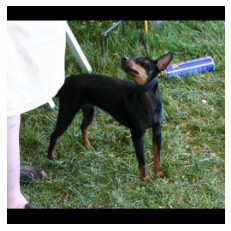

In [49]:
transform = transforms.Compose([transforms.Resize(220),
transforms.CenterCrop(255),
transforms.ToTensor()])
dataset = datasets.ImageFolder(PATH_IMAGES, transform=transform)
dataloader = data.DataLoader(dataset, batch_size=2539, shuffle=False)

images, labels = next(iter(dataloader))
print(labels, len(images), labels[2538])

imshow(images[2538], normalize=False)

In [42]:
transform = transforms.Compose([transforms.Resize(220),
transforms.CenterCrop(255),
transforms.ToTensor()])
dataset = datasets.ImageFolder(PATH_IMAGES, transform=transform)
dataloader = data.DataLoader(dataset, batch_size=30, shuffle=False)

images, labels = next(iter(dataloader))
print(labels, len(images))

fig, axes = plt.subplots(figsize=(300,30), ncols=30)
for i in range(30):
    ax = axes[i]
    imshow(images[i], ax=ax, normalize=False)

Output hidden; open in https://colab.research.google.com to view.